# 0. Imports

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
plt.rcParams["figure.autolayout"] = True

# 1. Data Fandago internally

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Note that the STARS are what is displayed by site and RATING is the actual user rating

In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


RATING and STARS seems to be in a linearly related

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:xlabel='RATING', ylabel='STARS'>

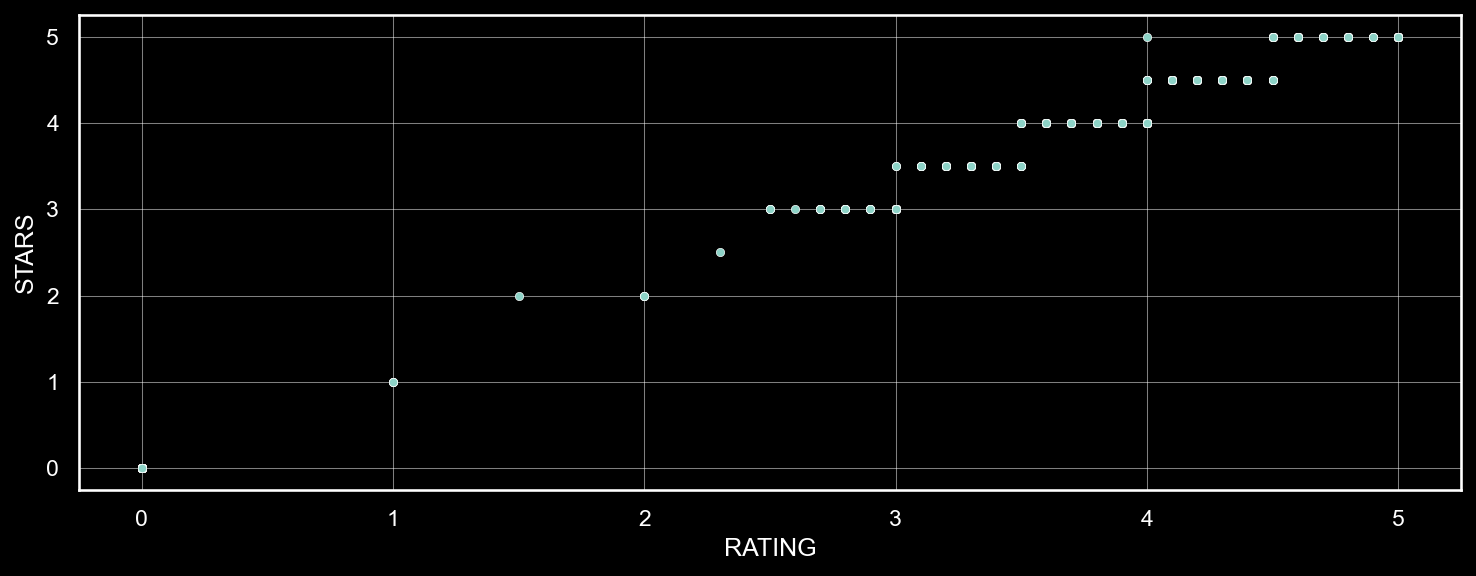

In [198]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='STARS')

Votes is the less correlated feature

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


We create the column YEAR for later convenience in the analysis

In [24]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

It seems like 2015 was dominant in number of  movies

<AxesSubplot:xlabel='YEAR', ylabel='count'>

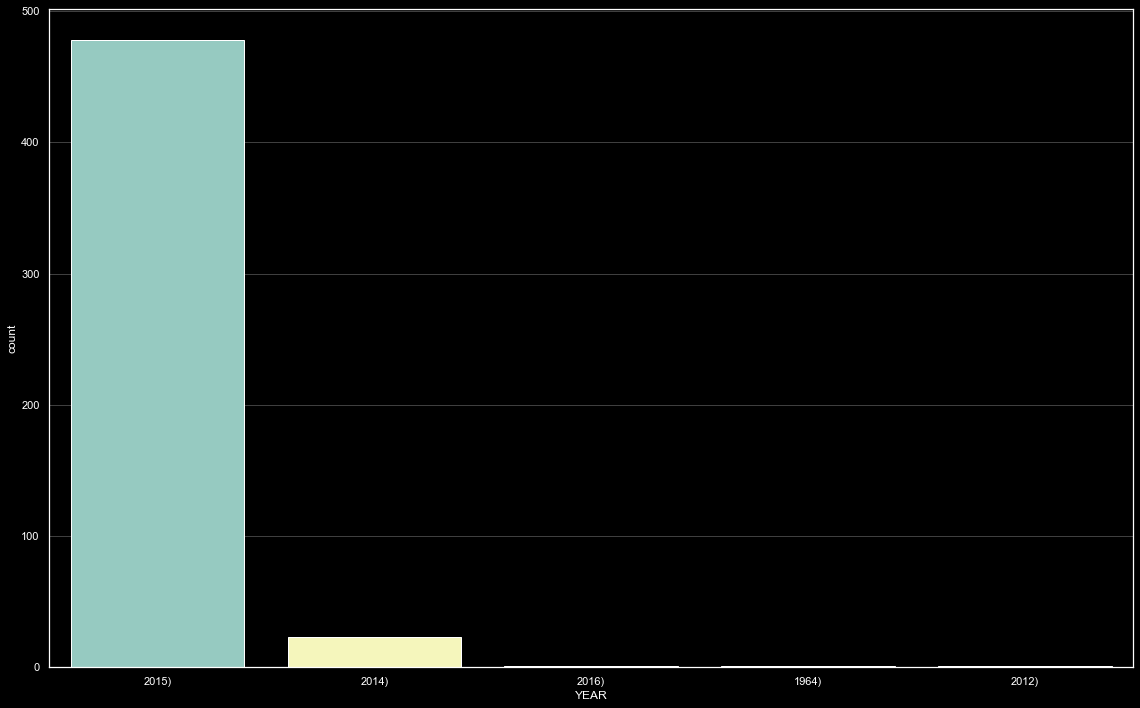

In [22]:
sns.countplot(data=fandango,x='YEAR')

Movies that got the highest number of votes

In [26]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


Movies that got the highest number of stars

In [27]:
fandango.nlargest(10,'STARS')

,FILM,STARS,RATING,VOTES,YEAR
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
10,Cinderella (2015),5.0,4.5,12640,2015)
11,Ant-Man (2015),5.0,4.5,12055,2015)
19,Straight Outta Compton (2015),5.0,4.8,8096,2015)
21,The Imitation Game (2014),5.0,4.6,8055,2014)
24,Selma (2014),5.0,4.6,7025,2014)
32,Southpaw (2015),5.0,4.6,5597,2015)
43,Dragon Ball Z: Resurrection 'F' (2015),5.0,4.8,3740,2015)


Check for any 0 vote movies

In [28]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

We remove these as outliers by defining a new dataframe called fan_reviewed

In [44]:
fan_reviewed = fandango[fandango['VOTES']>0]

Display the difference in between RATING and STARS

<Figure size 1800x900 with 0 Axes>

<AxesSubplot:xlabel='RATING', ylabel='Density'>

<AxesSubplot:xlabel='RATING', ylabel='Density'>

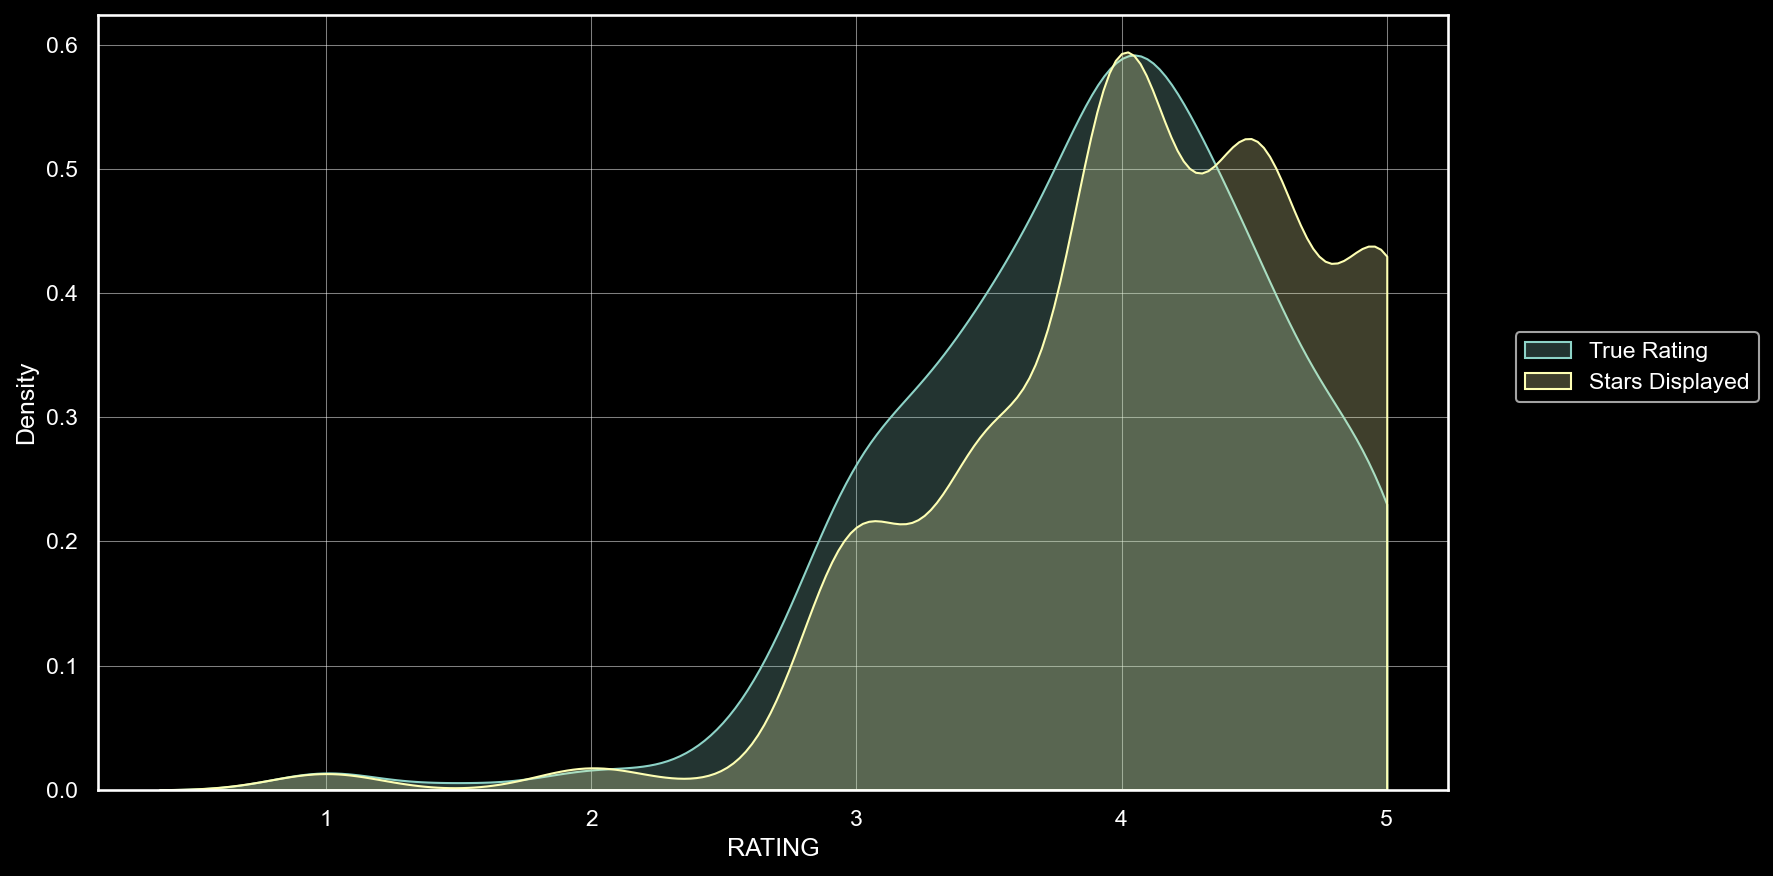

In [34]:
plt.figure(figsize=(12,6),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

There is obviously a difference bias toward higher prices. Let us properly quantify it

In [39]:
fan_reviewed.loc[:,'STARS']

0             4.0
1             4.5
2             5.0
3             5.0
4             4.5
             ... 
431           5.0
432           5.0
433           5.0
434           5.0
STARS_DIFF    NaN
Name: STARS, Length: 436, dtype: float64

In [51]:
fan_reviewed.loc[:,'STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed.loc[:,'STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)
fan_reviewed

C:\Users\JustAnotherBot\AppData\Local\Temp\ipykernel_24600\3876730171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed.loc[:,'STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\JustAnotherBot\AppData\Local\Temp\ipykernel_24600\3876730171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed.loc[:,'STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


Let us locate where the discrepancies rely mostly

<Figure size 1800x600 with 0 Axes>

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

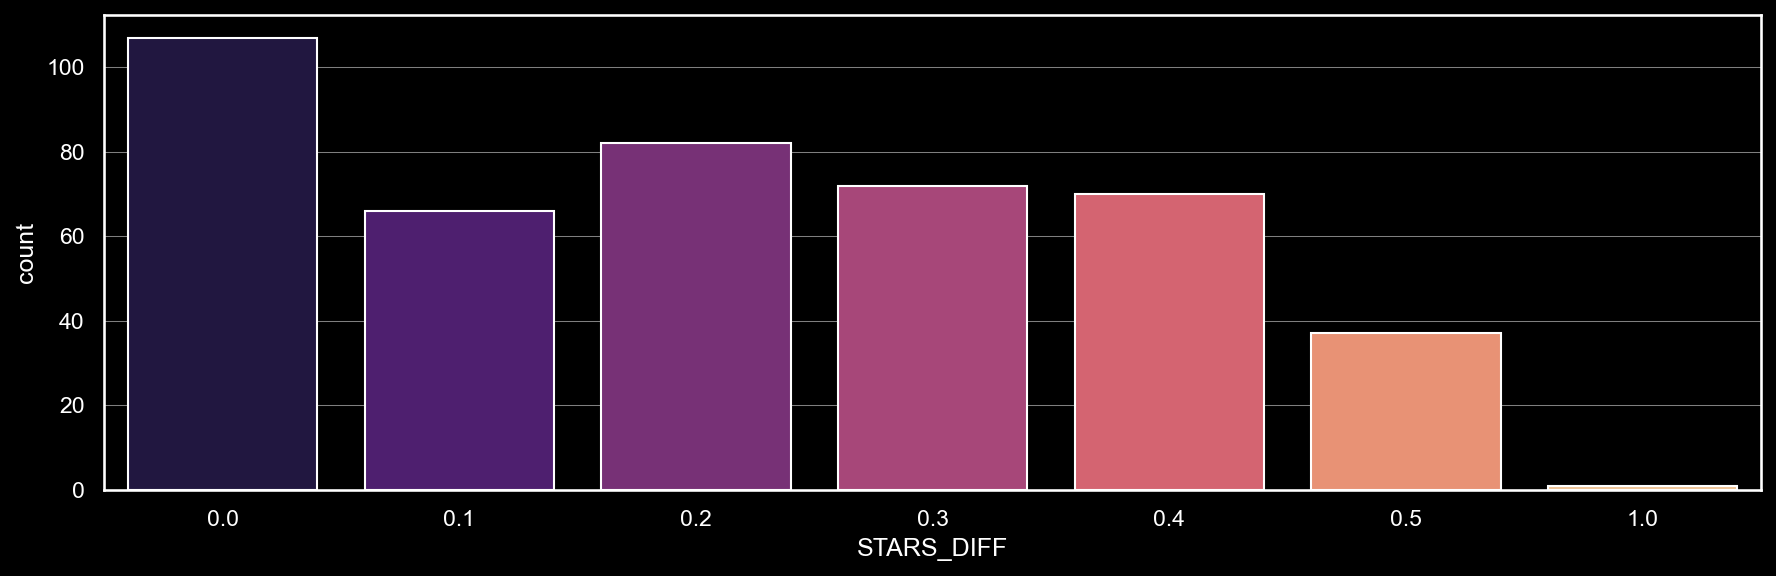

In [46]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

They are mostly located in 0.2-0.3 and there is actually 1 whole star difference for some movie(s)

In [52]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


Let us finally define as a metric the absolute mean of the diff column

In [60]:
fan_reviewed['STARS_DIFF'].apply(abs).mean()

0.2117241379310347

Finally we plot the absolute difference

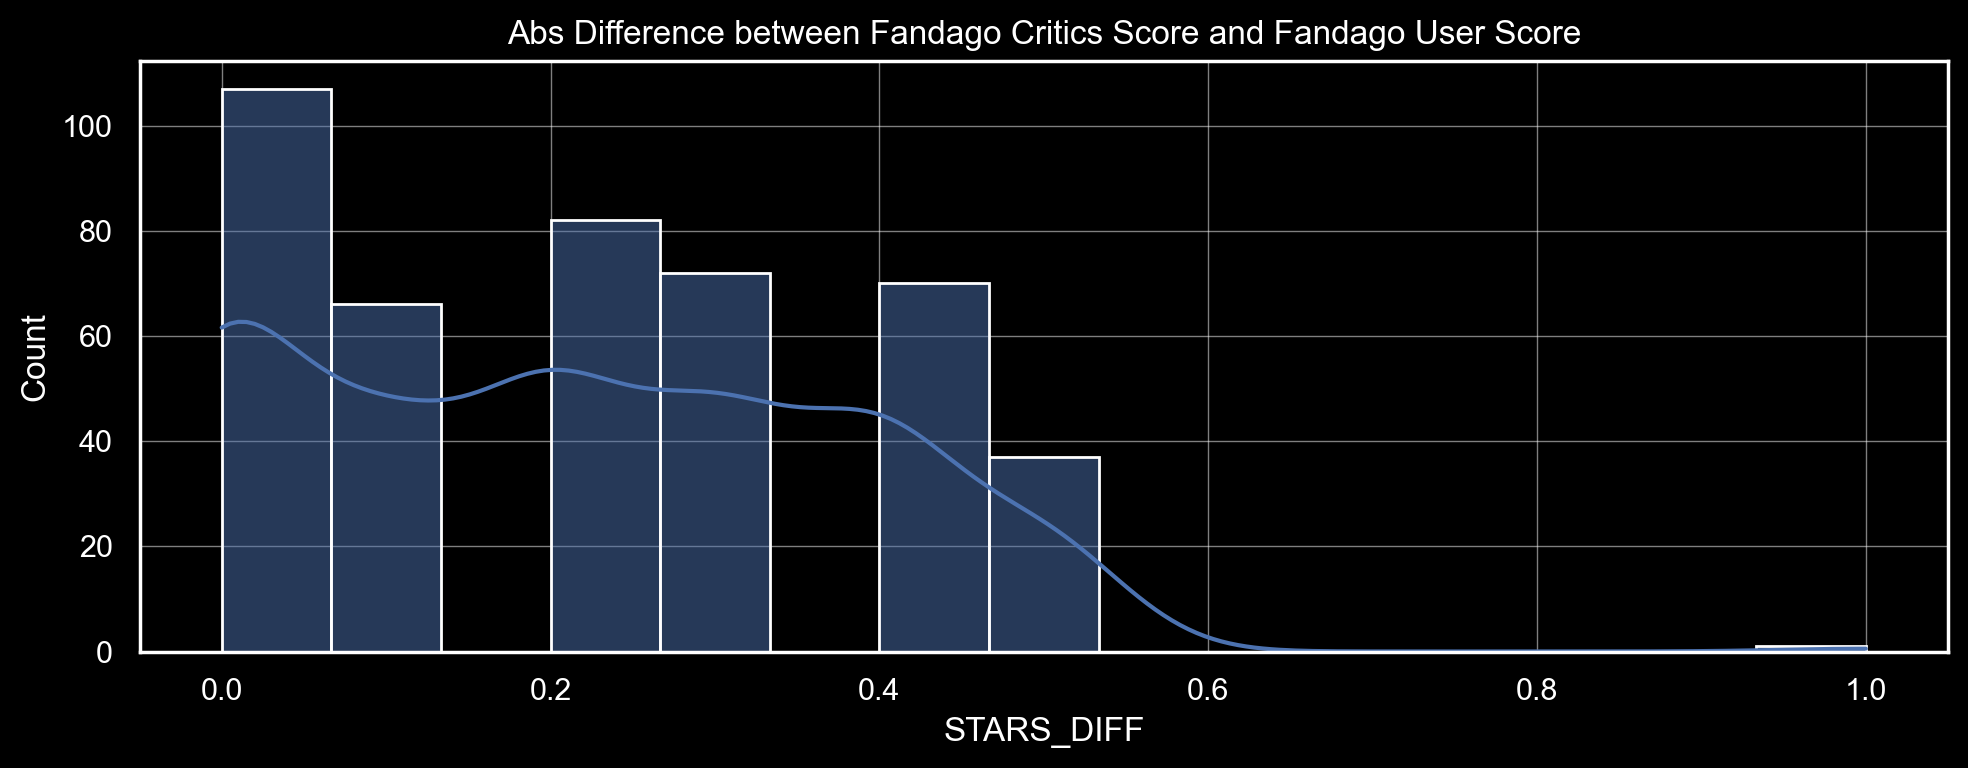

In [72]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=fan_reviewed['STARS_DIFF'].apply(abs),bins=15,kde=True)
plt.title("Abs Difference between Fandago Critics Score and Fandago User Score");

# 2. Compare Fandago with other sites

In [53]:
all_sites = pd.read_csv("all_sites_scores.csv")

In this dataset we have added RottenTomatoes, Metacritic and IMDB

In [57]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [54]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [55]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [56]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## 2.1 Rotten Tomatoes

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

(0.0, 100.0)

(0.0, 100.0)

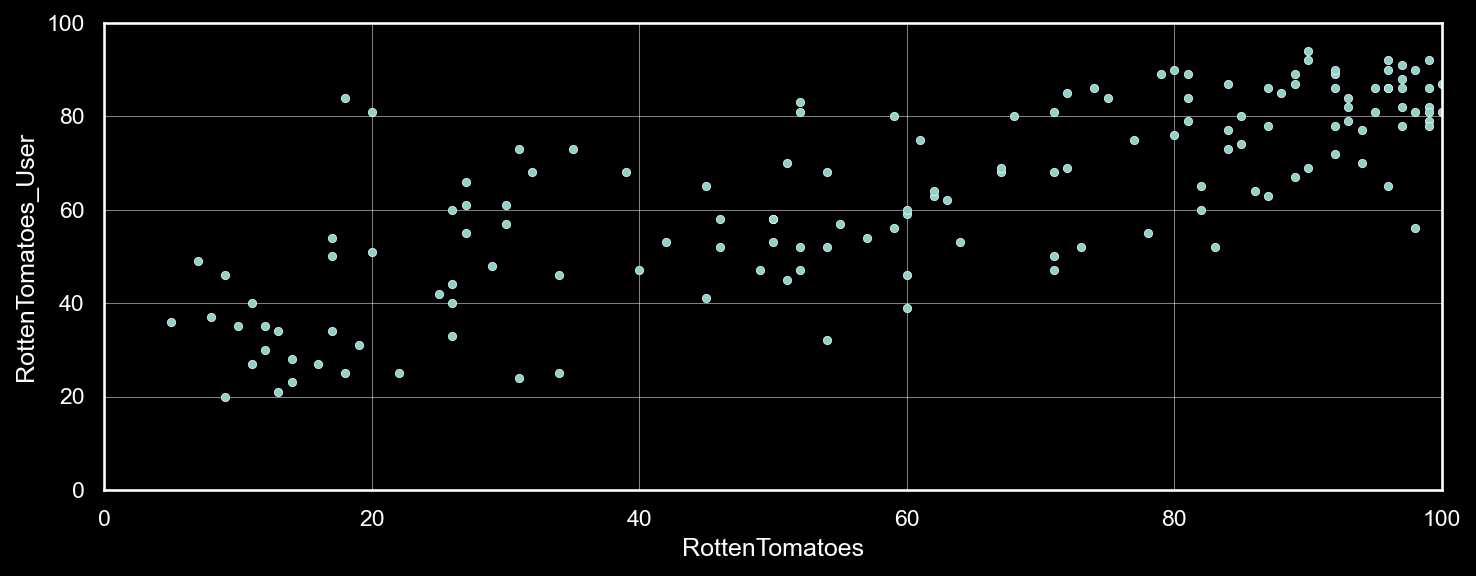

In [58]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

We follow the same procedure in analysing the discrepansies

In [59]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

We calculate the absolute mean again

In [61]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

We can already see that the users have higher ratings than the displayed stars since there are negative values

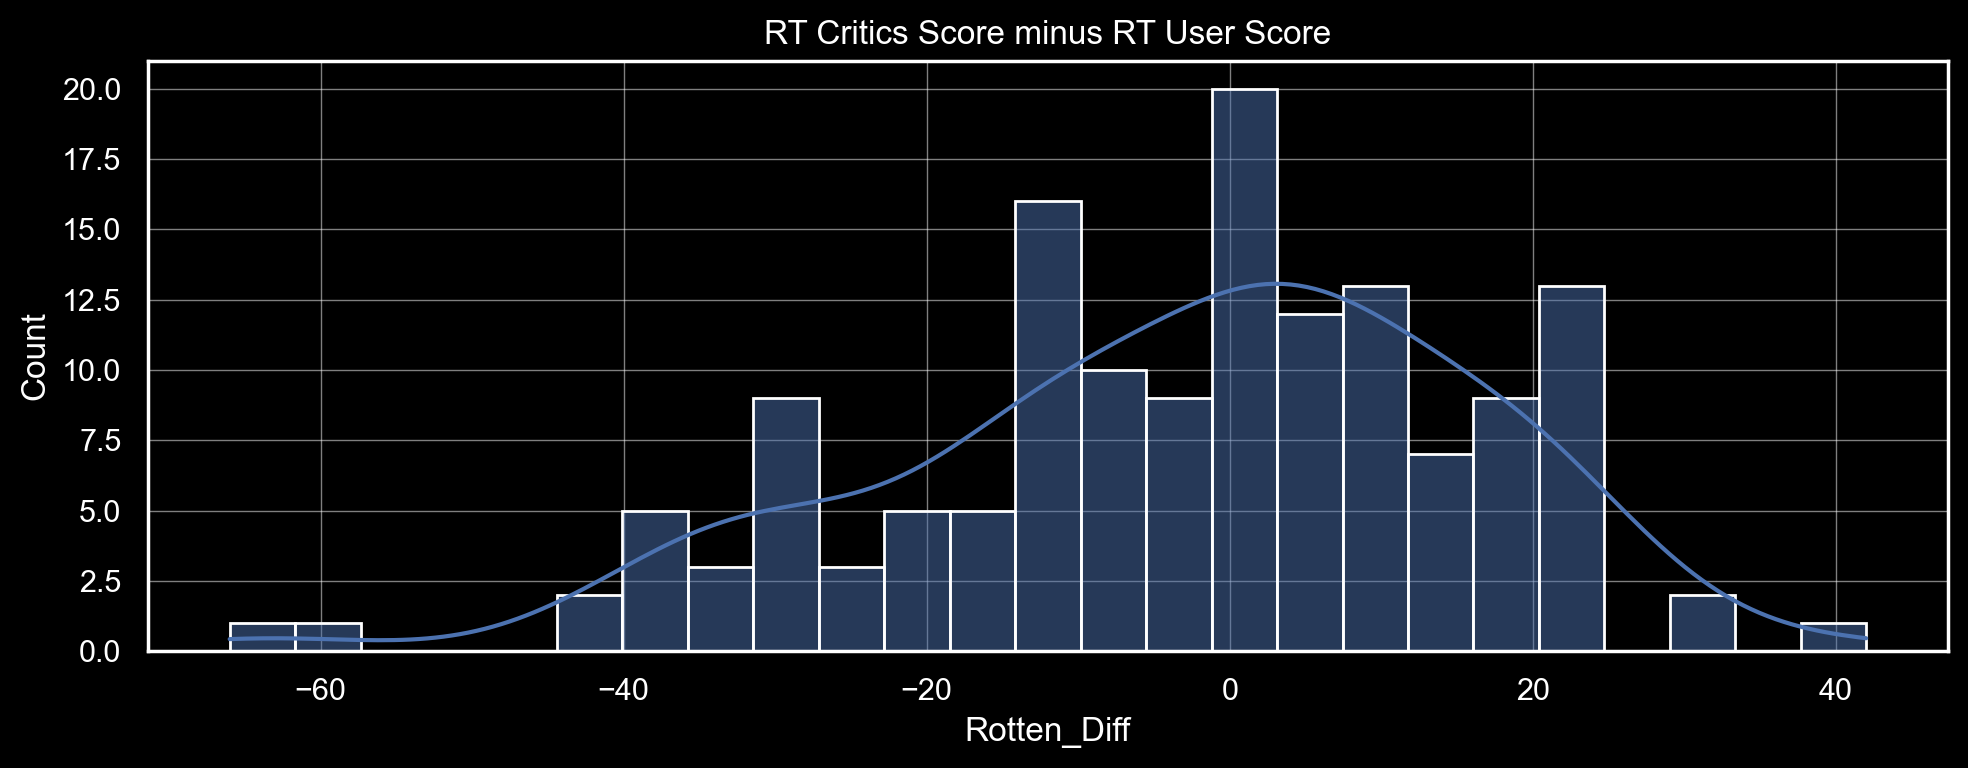

In [62]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

Probing the absolute difference

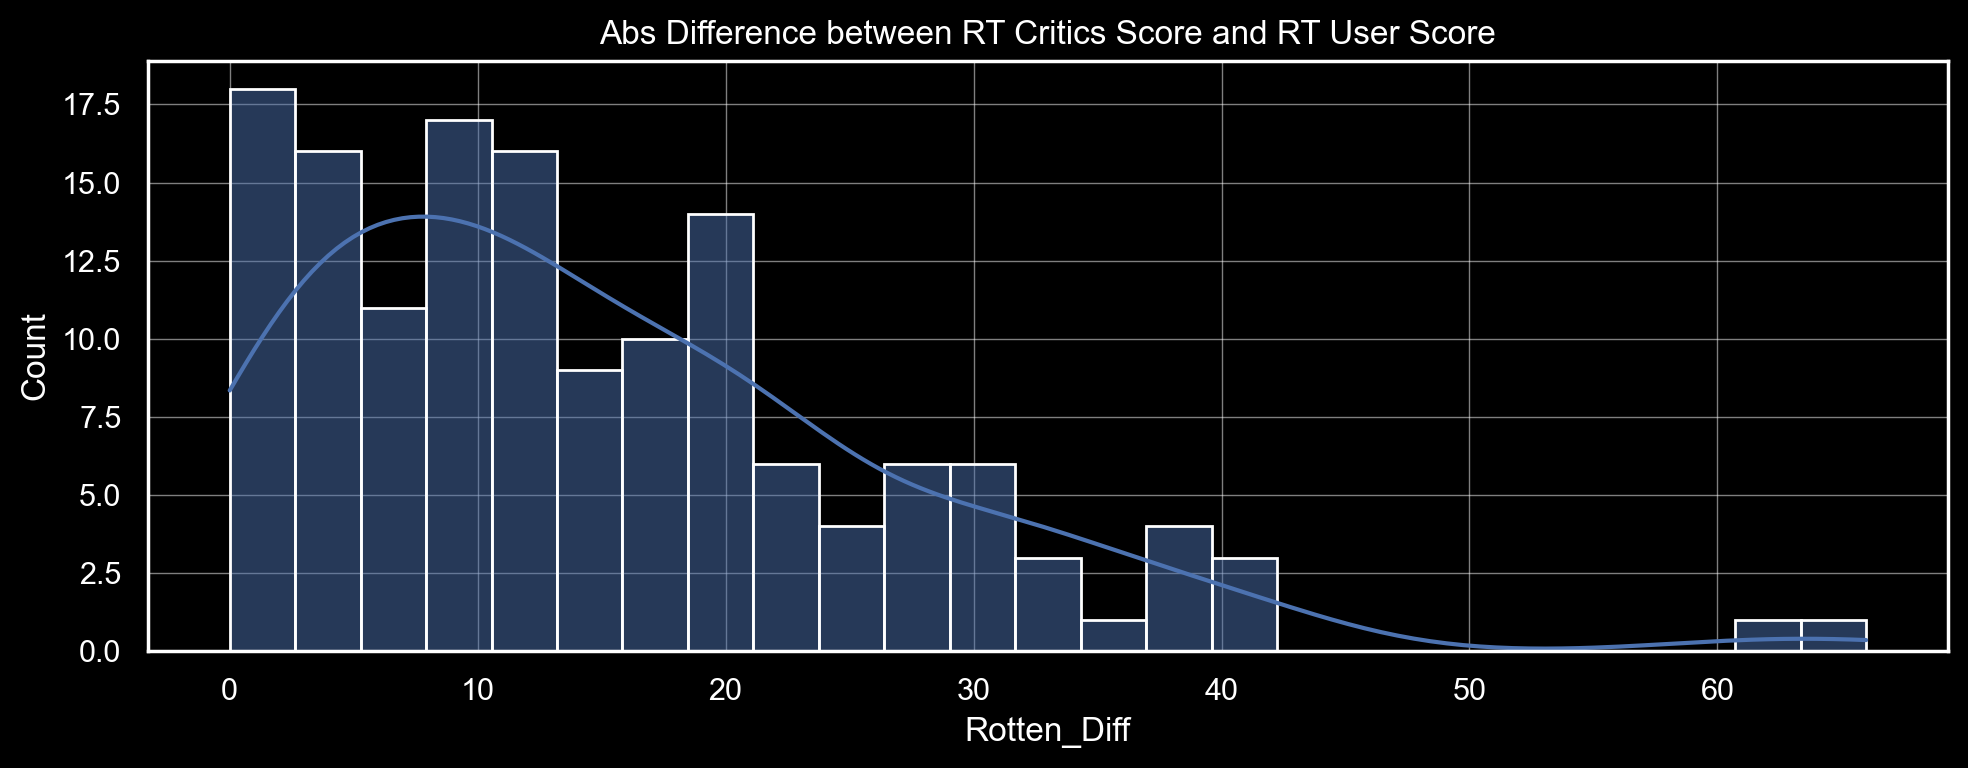

In [63]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

We find the outliers that cause the largest differences

In [76]:
print("More favourable by the Users")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

More favourable by the Users


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [75]:
print("More favourable by the critics")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

More favourable by the critics


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## 2.2 Metacritic and IMDB

Let us only plot the case for Metacritic


<Figure size 1500x600 with 0 Axes>

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

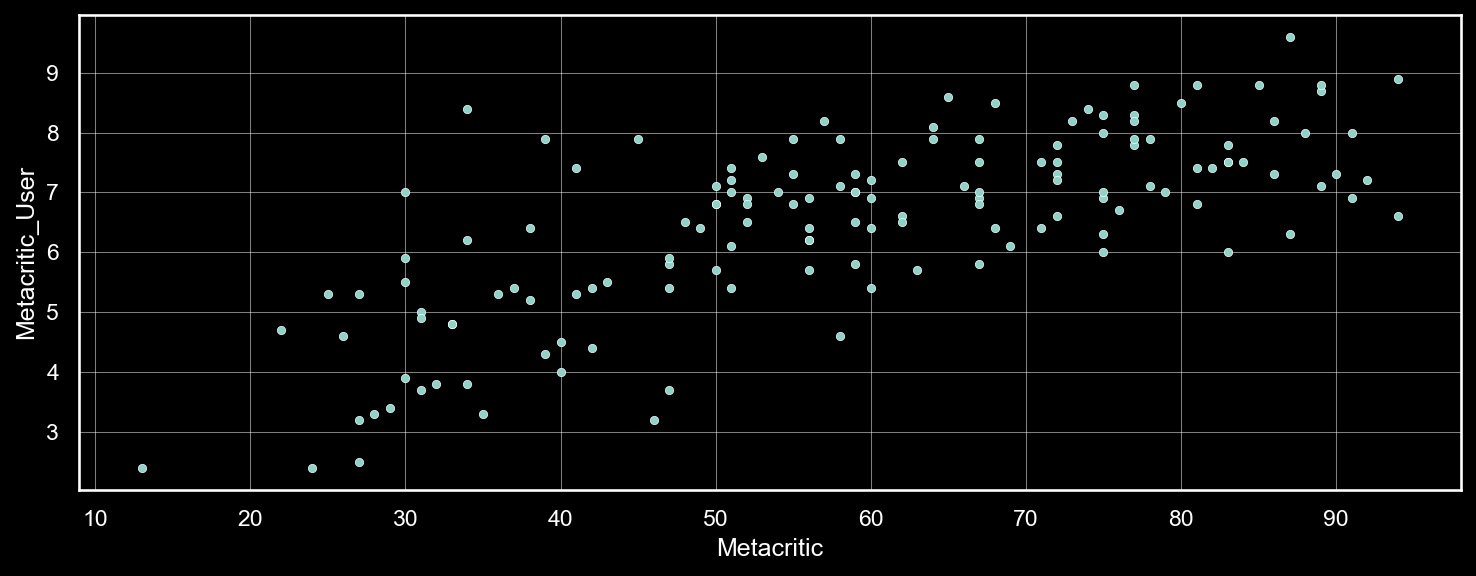

In [92]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:xlabel='IMDB', ylabel='IMDB_user_vote_count'>

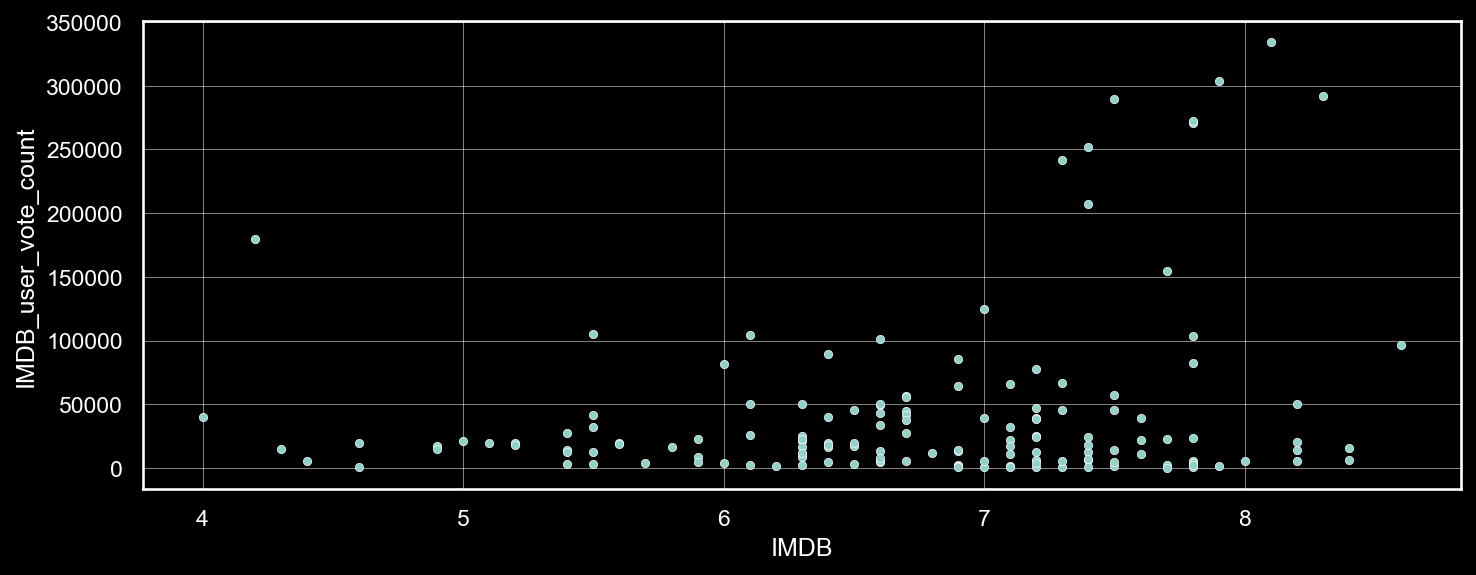

In [93]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='IMDB',y='IMDB_user_vote_count')

We compare IMDB with Metacritic user votecount

<Figure size 1800x900 with 0 Axes>

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

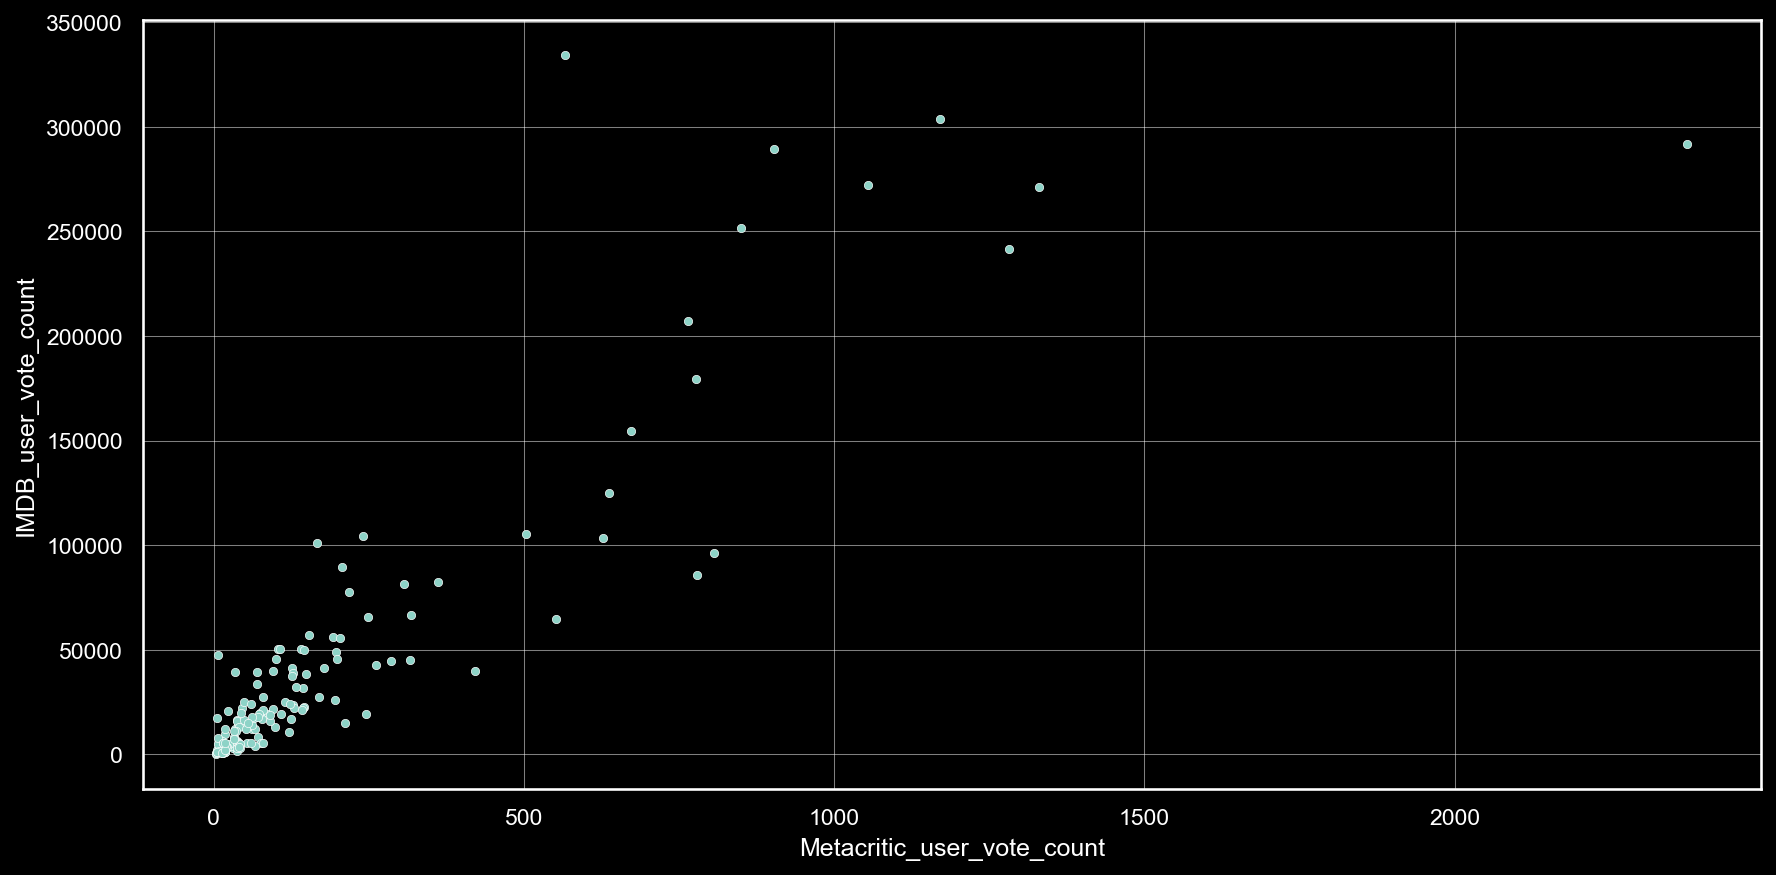

In [81]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

There are 2 outliers here

In [99]:
all_sites[['FILM', 'Metacritic_user_vote_count', 'IMDB_user_vote_count']].nlargest(1,'IMDB_user_vote_count')

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),566,334164


In [98]:
all_sites[['FILM', 'Metacritic_user_vote_count', 'IMDB_user_vote_count']].nlargest(1,'Metacritic_user_vote_count')

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),2375,292023


the differences in counts between the two sites are striking for these two movies

## 2.3 Fandago vs rest sites

First we combine the data

In [100]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [103]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In order to be able to analyse the data we need to normalize it carefully. 
- Careful not to run the cells more than once

In [104]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [105]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [106]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [107]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


We isolate the scores

In [109]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


<AxesSubplot:ylabel='Density'>

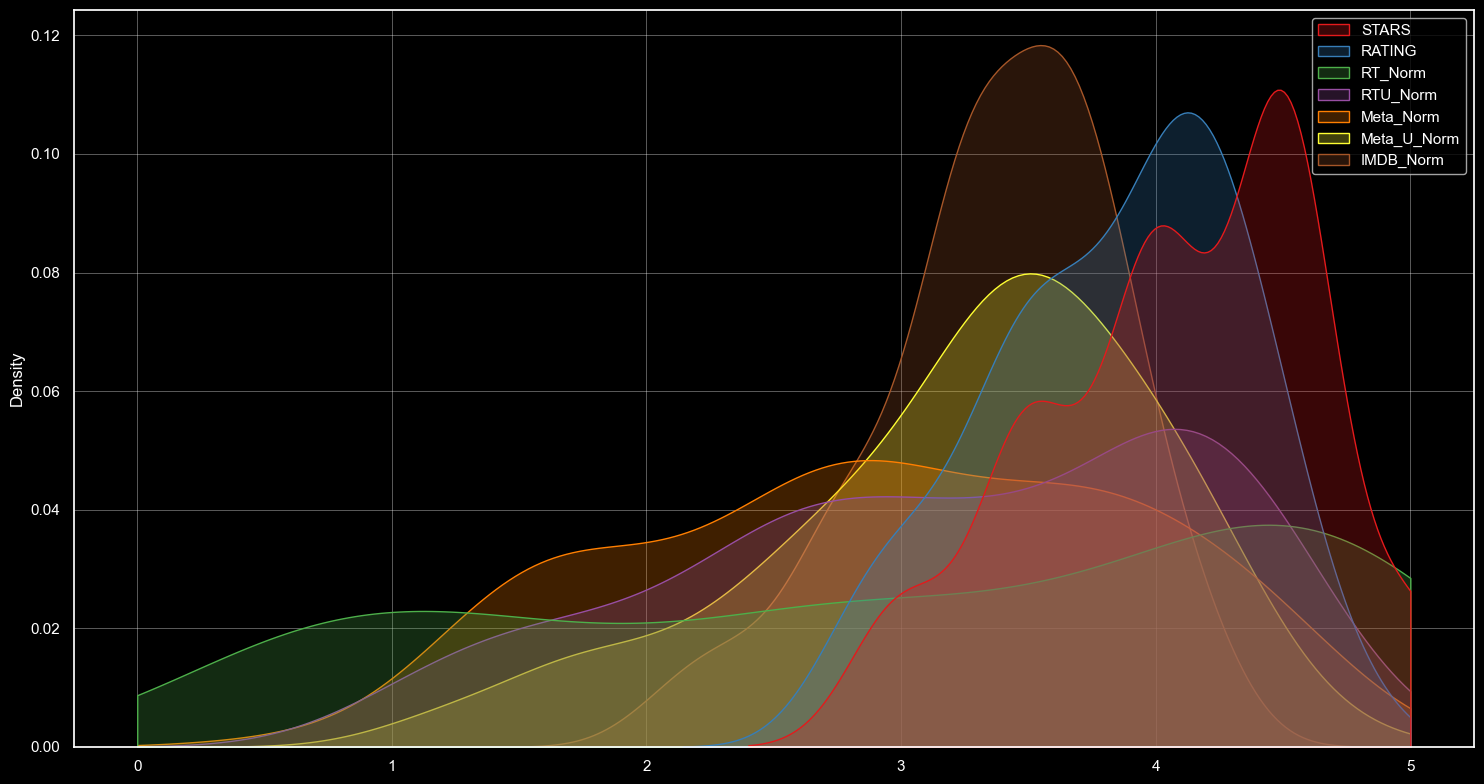

In [118]:
fig, ax = plt.subplots(figsize=(15,8),dpi=100)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)

- It is obvious that Fandango has an uneven distribution.
- RT critics have the most uniform distribution.

Next we compare RT critic ratings vs Fandango STARS

<AxesSubplot:ylabel='Density'>

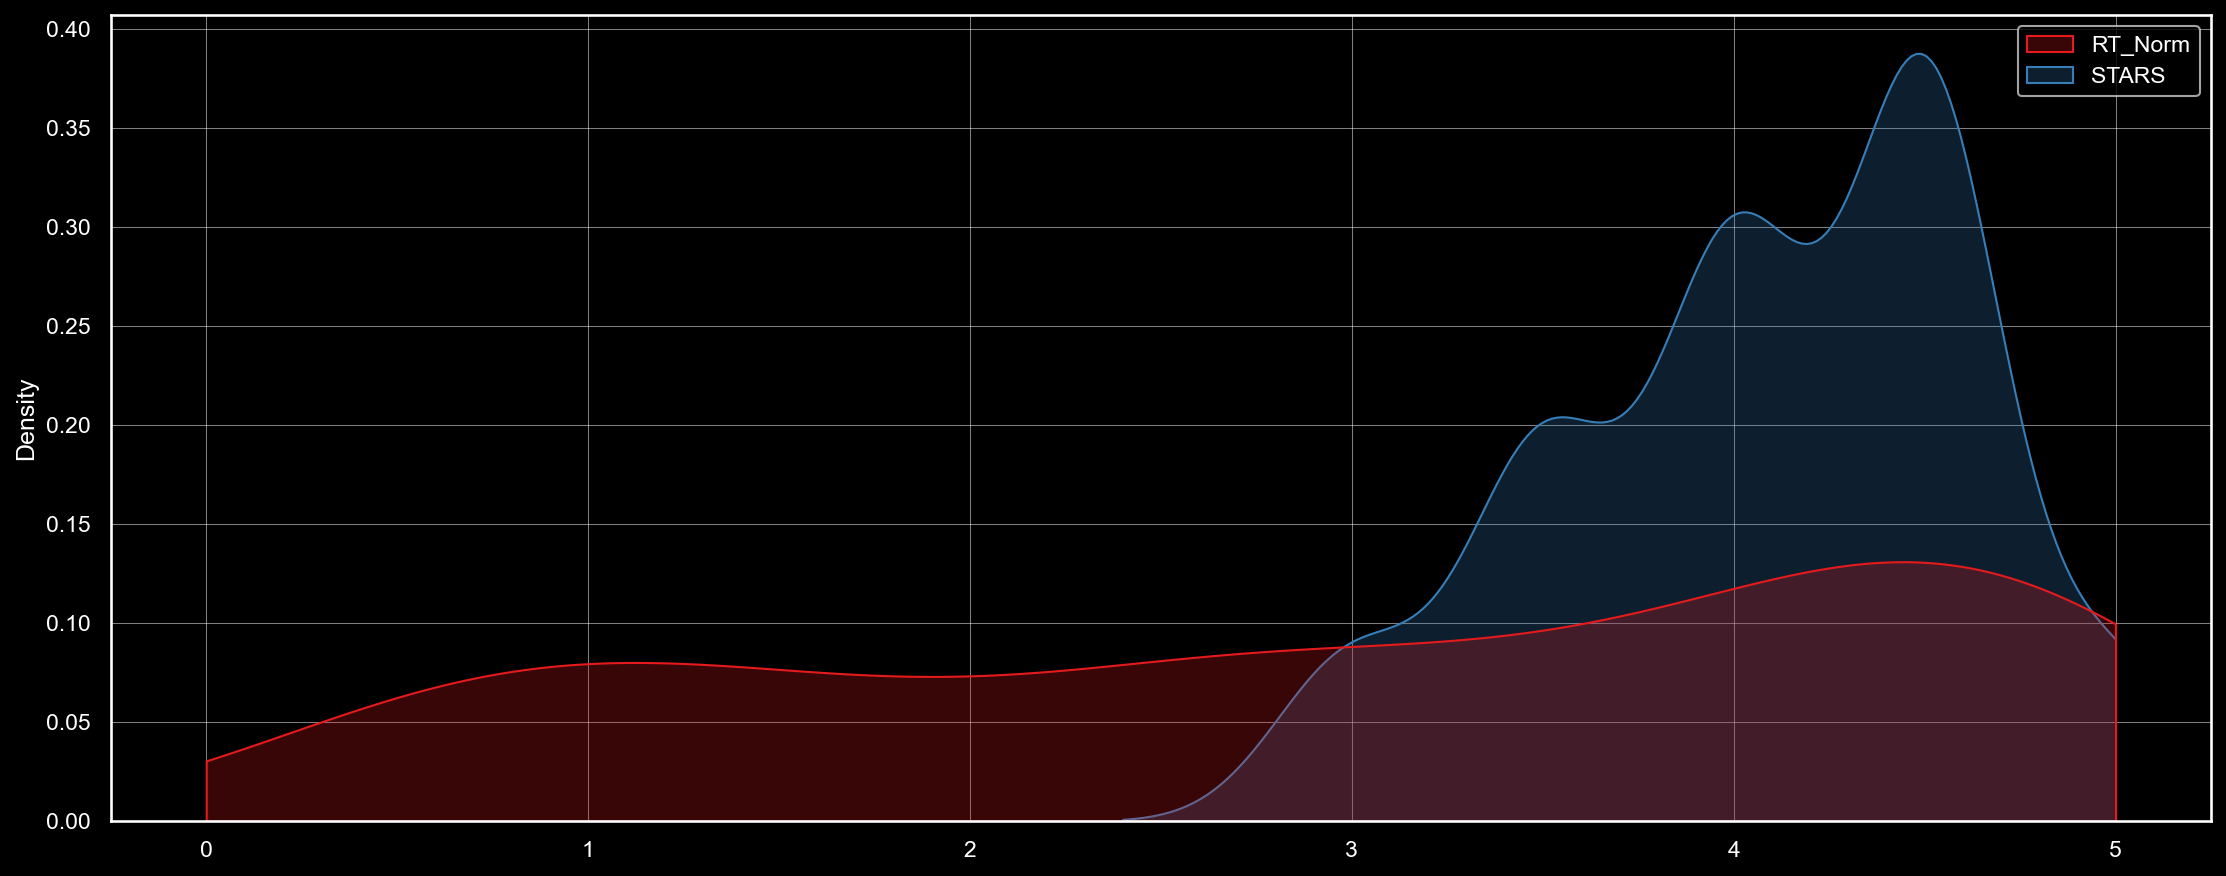

In [119]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)

Clearly Fandango displays much higher density toward higher values on STARS

The most obvious comparison to evidence the bloated values on Fandago STARS would be at its worst movies. 

In [121]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [126]:
norm_films.nsmallest(10,'RT_Norm').set_index('FILM')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
FILM,,,,,,,
Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


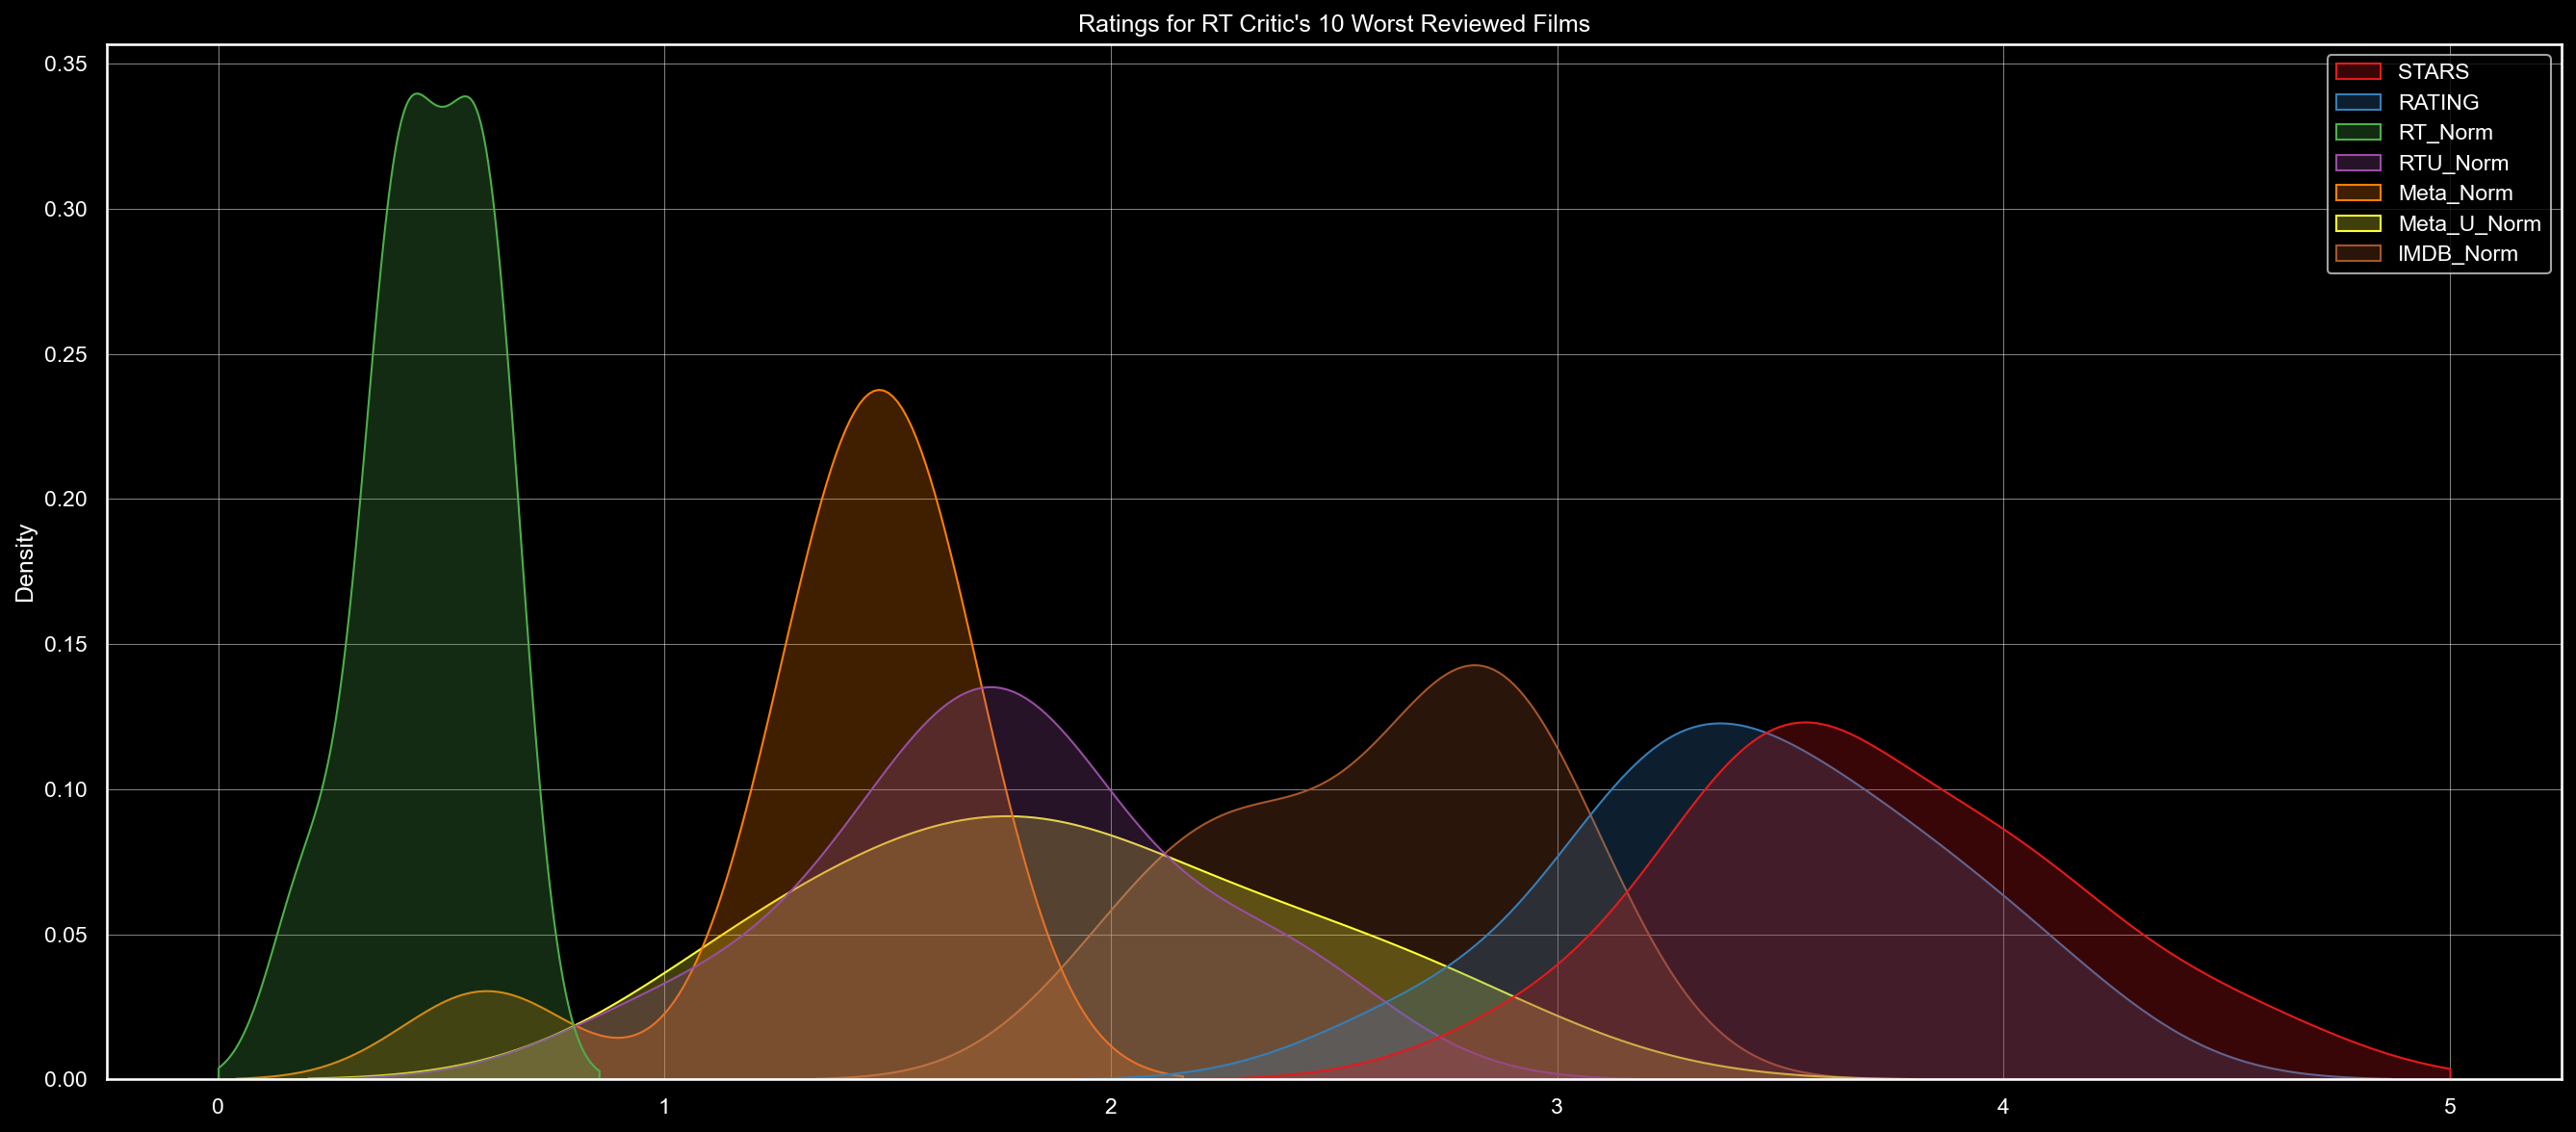

In [123]:
plt.figure(figsize=(18,8),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

STARS are higher in density for the lowest values this time, which proves our claim.

In [175]:
norm_films = norm_films.set_index('FILM')

Finally we find the movies for which Fandago STARS differ more.
- This is achieved by subtracting 'STARS' from all columns.
- Then we add all columns.

In [178]:
norm_films.agg(lambda x: x-norm_films['STARS']).agg('sum', axis=1).sort_values()

FILM
Do You Believe? (2015)                      -14.2
Taken 3 (2015)                              -13.6
Pixels (2015)                               -12.6
Hot Pursuit (2015)                          -12.3
The Loft (2015)                             -12.2
                                             ... 
'71 (2015)                                    3.0
Gett: The Trial of Viviane Amsalem (2015)     3.5
Phoenix (2015)                                3.6
Two Days, One Night (2014)                    3.7
It Follows (2015)                             4.3
Length: 145, dtype: float64

We save the indices

In [180]:
idxs = norm_films.agg(lambda x: x-norm_films['STARS']).agg('sum', axis=1).sort_values().index

and we retrieve the worst movies that are up to 2-3 STARS in difference

In [194]:
norm_films.loc[idxs,:].head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
FILM,,,,,,,
Do You Believe? (2015),5.0,4.5,0.9,4.2,1.1,2.4,2.7
Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
Pixels (2015),4.5,4.1,0.8,2.7,1.4,2.6,2.8
Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2


---
To conclude, our analysis points towards the scenario that Fandago indeed tempered with the STARS against its RATINGS for profit generated from selling more tickets even for the worst rated movies.

This was reinforced by comparing the Fandago data against other sites.